<a href="https://colab.research.google.com/github/LuongKhanh03/AdvProg_L0-Hello/blob/main/Lab5laptrinhdsp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nội dung của bài thực hành này là tìm hiểu về wavelet; đặc biệt về khả năng "scaling" hay co giãn của wavelet. Bên cạnh đó, bài lab sẽ xem xét sự khác biệt trong việc lựa chọn các hàm sóng con khác nhau. Cuối cùng ta xem xét 1 số ví dụ cơ bản của wavelet trong khử nhiễu trên tín hiệu; nén tín hiệu và tìm đỉnh trên tín hiệu.

**Phần 1: Wavelet và scalogram? Sự khác biệt giữa spectrum, spectrogram và scalogram?**

Về cơ bản, phép phân tích hay biểu diễn sóng con (wavelet transform) là cách chúng ta biểu diễn tín hiệu x(t) thành tổ hợp của các hàm sóng con. Mỗi hàm sóng con (ψ(t)) là một hàm  xác định trong cả miền thời gian và tần số. Nói cách khác, mỗi sóng con có một dải tần hẹp và có chiều dài hữu hạn trong miền thời gian.  Điều này khác biệt với phép phân tích Fourier, khi tín hiệu phân tích thành các sin, chỉ xác định trong miền tần số; nhưng dài vô hạn.

Các hàm sóng con (wavelet)(hay thoả mãn điều kiên là sóng con) nếu thoả mãn một số điều kiện như sau:

_Các wavelet có năng lượng hữu hạn ∫|ψ(t)|^2 dt < ∞. Điều này để đảm bảo rằng các sóng con là ổn định và do đó ta có thể phân tích và tổng hợp tín hiệu từ các sóng con mà không mất mát thông tin.

_Không có thành phần DC khi phân tích Fourier transform. Điều này đảm bảo wavelet có phổ dạng bandpass.

_Các wavelet có mean =0, hay ∫ψ(t)dt = 0 hay các wavelet is oscillatory i.e. it's a wave and has zero crossings.

Có rất nhiều hàm wavelet, được đặt tên theo hình dạng hoặc theo tên người tìm ra chúng. Trong ví dụ này chúng ta dùng làm  Morlet wavelets để làm ví dụ, vì nó dễ cho việc so sánh và phân tích thời gian và tần số.

In [ ]:
# Load các thư viện

In [ ]:
from typing import Any, Dict, List, Optional

import matplotlib.pyplot as plt
import numpy as np
import torch
#from kymatio.torch import Scattering1D
from torch import Tensor

1. Morlet wavelet trong thời gian , tần số; cùng với scaling và translating?

In [ ]:
import numpy as np

In [ ]:
# Khai báo hàm Morlet theo công thức toán của nó:
# Đặc trưng của hàm  Morlet là tần số trung tâm và độ rộng (tương đương với tham số sigma trong hàm Gauss)
def calc_morlet_psi_simple(t, freq_hz, sigma):
    """
    Args:
      t: time values in seconds centered at 0
      freq: center frequency of the wavelet in Hz
      sigma: standard deviation of the gaussian
      return: a complex tensor of wavelet coefficients in the time domain
    """
    complex_sinusoid = torch.exp(1j * 2 * torch.pi * freq_hz * t)
    gaussian = torch.exp(-0.5 * (t ** 2) / (sigma ** 2))
    y = complex_sinusoid * gaussian
    return y

Text(0, 0.5, 'amplitude')

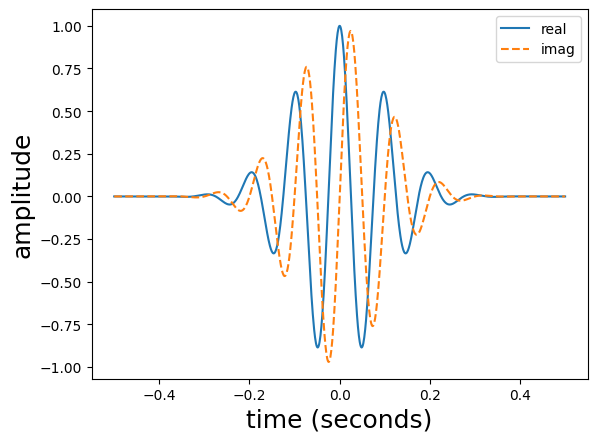

In [ ]:
t = torch.linspace(-0.5, 0.5, 1000)  # Create wavelet from -0.5 to 0.5 seconds with 1000 points
sr = 1000  # Sampling rate is 1000 Hz since it's 1000 points over 1 second
freq_hz = 10.0  # Center frequency of the wavelet in Hz
sigma = 0.1  # Standard deviation of the gaussian

psi = calc_morlet_psi_simple(t, freq_hz, sigma)
plt.plot(t, psi.real, "-")
plt.plot(t, psi.imag, "--")
plt.legend(["real", "imag"])
plt.xlabel("time (seconds)", fontsize=18)
plt.ylabel("amplitude", fontsize=18)

In [ ]:
# Hàm vẽ tín hiệu:

def plot_wavelet_time_domain(t, psi):
    """
    Args:
        :param t: time values in seconds
        :param psi: complex tensor of wavelet coefficients in the time domain
        :param title: title of the plot
        :param hide_x: remove ticks and numbers from x-axis
        :param hide_y: remove ticks and numbers from y-axis
    """
    plt.plot(t, psi.real, "-")
    plt.plot(t, psi.imag, "--")
    plt.legend(["real", "imag"])
    plt.xlabel("time (seconds)", fontsize=18)
    plt.ylabel("amplitude", fontsize=18)
    plt.show()


def plot_wavelet_freq_domain(psi_td, sr):
    """
    Args:
        :param psi_td: discrete wavelet coefficients in the time domain
        :param sr: sampling rate
        :param title: title of the plot
        :param max_x_freq: max frequency to display on the x-axis, if None defaults to Nyquist
    """
    t = torch.linspace(0, sr, psi_td.size(0))
    psi_fd = torch.fft.fft(psi_td)  # Convert the wavelet to the frequency domain
    x_lim = t.size(0) // 2
    plt.plot(t[:x_lim], psi_fd.abs()[:x_lim], "b")
    plt.xlabel('freq (Hz)', fontsize=18)
    plt.ylabel('Abs', fontsize=18)
    plt.show()


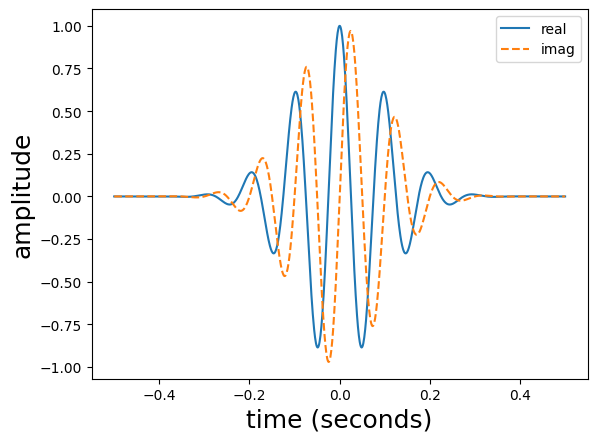

In [ ]:
t = torch.linspace(-0.5, 0.5, 1000)  # Create wavelet from -0.5 to 0.5 seconds with 1000 points
sr = 1000  # Sampling rate is 1000 Hz since it's 1000 points over 1 second
freq_hz = 10.0  # Center frequency of the wavelet in Hz
sig = 0.1  # Standard deviation of the gaussian

psi = calc_morlet_psi_simple(t, freq_hz, sigma)
plot_wavelet_time_domain(t, psi)


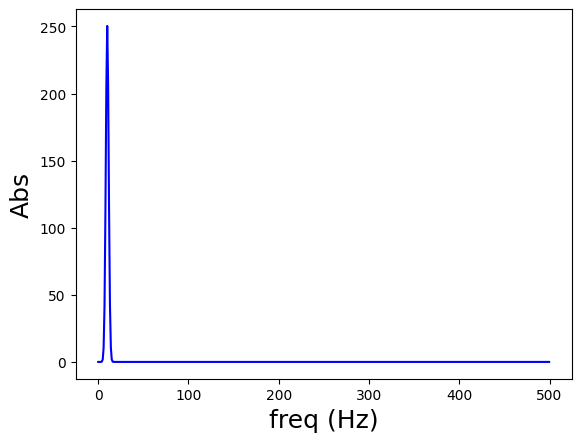

In [ ]:
plot_wavelet_freq_domain(psi, sr)

Kiểm tra tính chất co giãn (scaling) trong miền thời gian và tần số. Ở đây, thay đổi sigma trong hàm Gauss, có thể thay đổi độ rộng của sóng con Morlet hay tương ứng với thay đổi độ rộng tín hiệu trong miền thời gian.

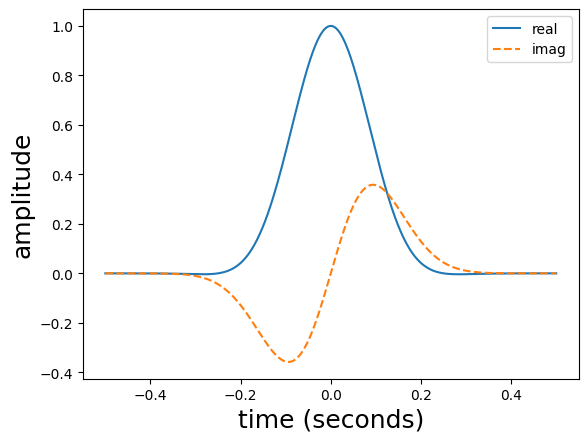

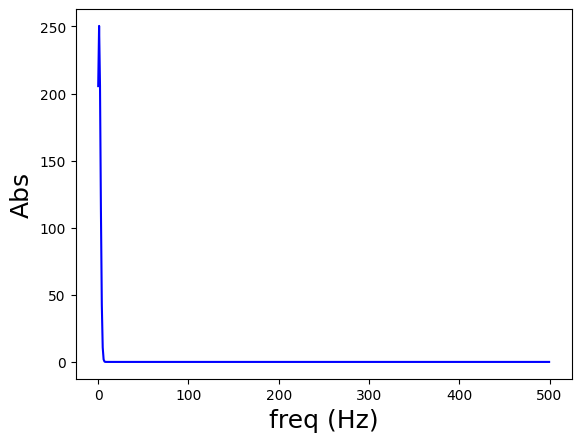

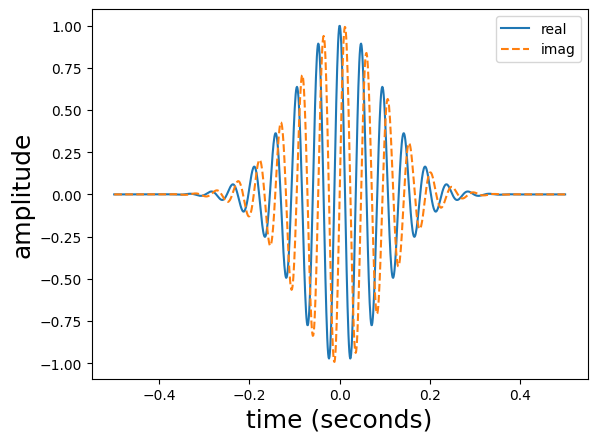

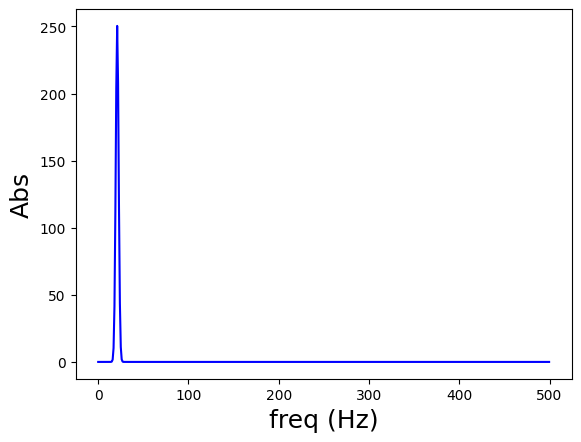

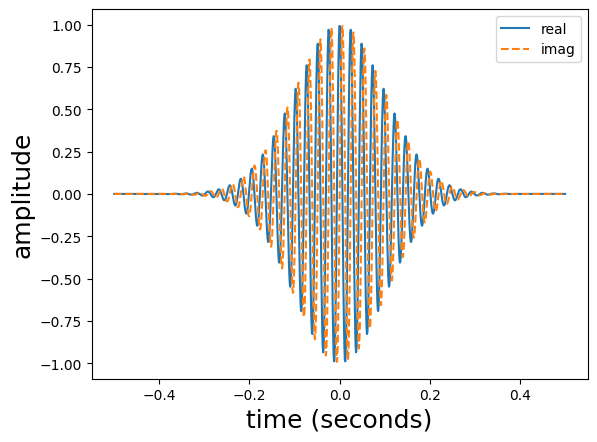

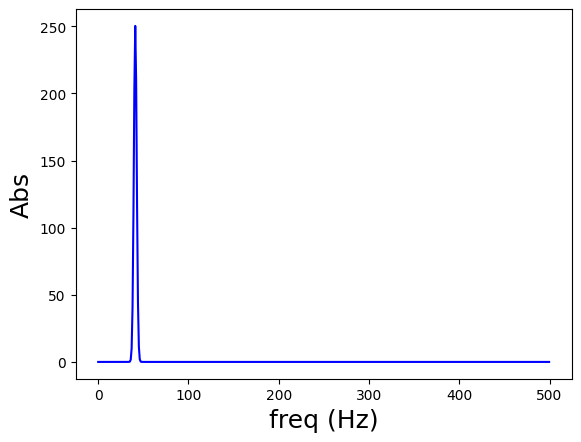

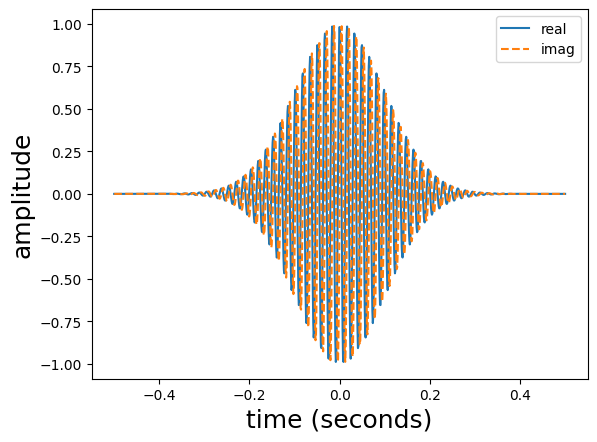

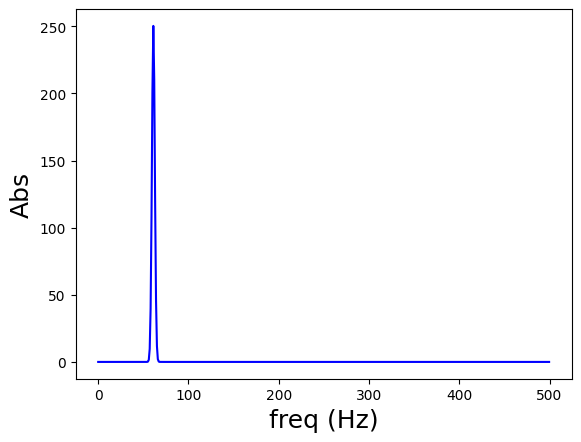

In [ ]:
for f in np.arange(1, 80, 20):
    psi = calc_morlet_psi_simple(t, f, sig)
    plot_wavelet_time_domain(t, psi)
    plot_wavelet_freq_domain(psi, sr)
    plt.show()


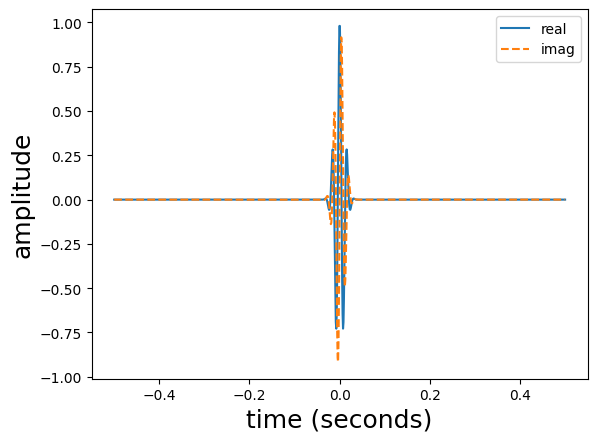

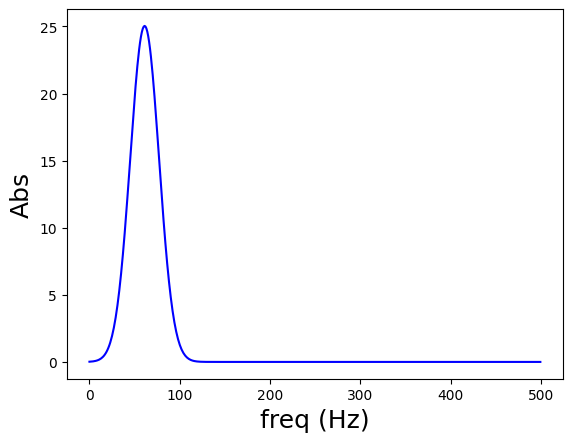

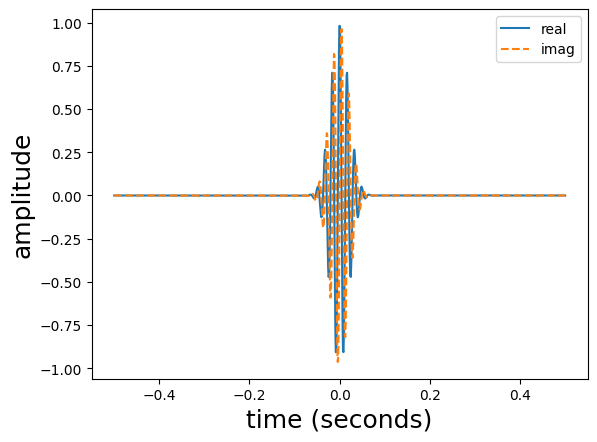

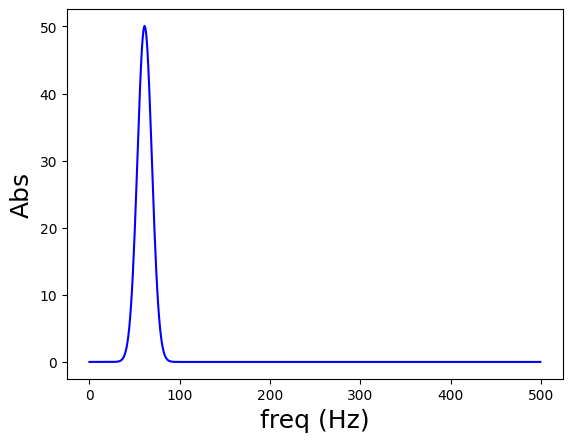

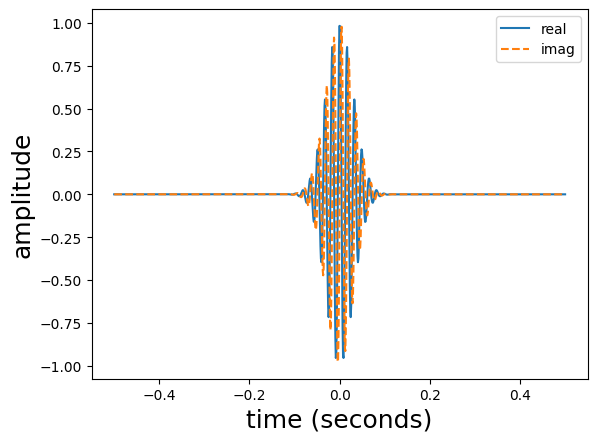

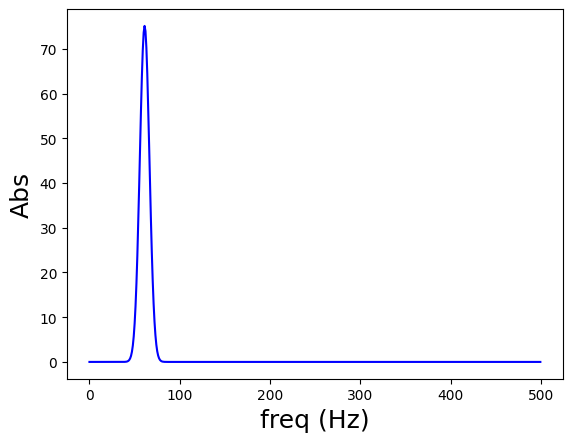

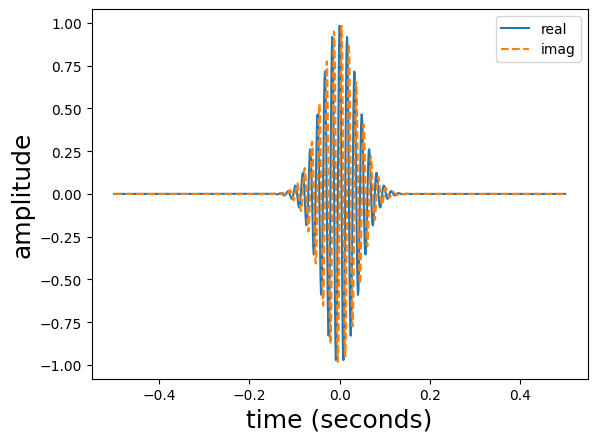

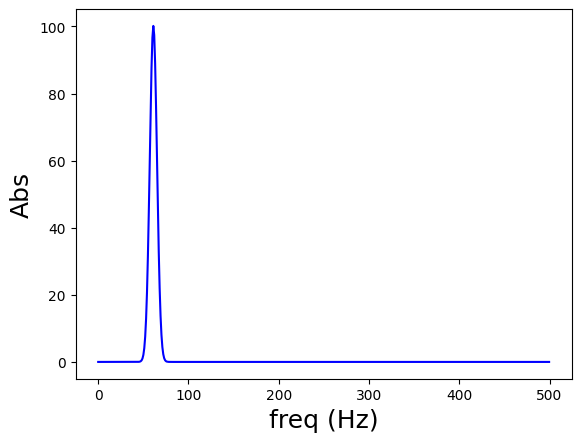

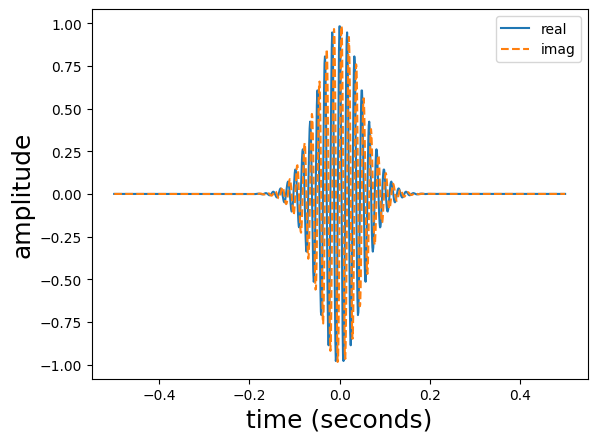

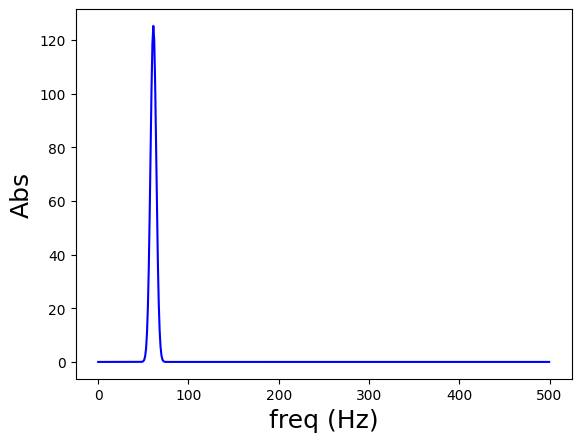

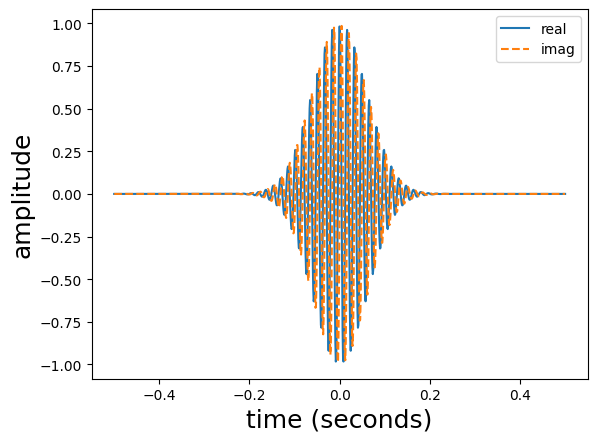

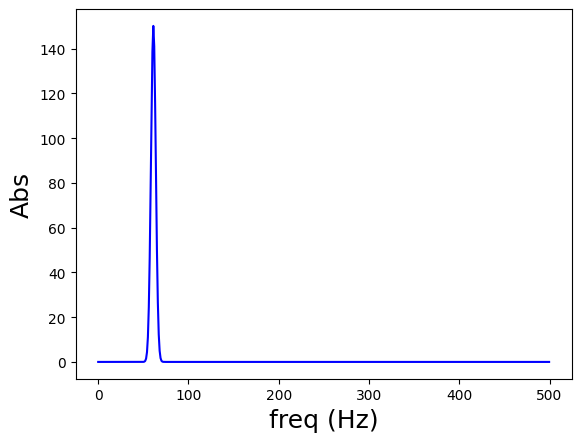

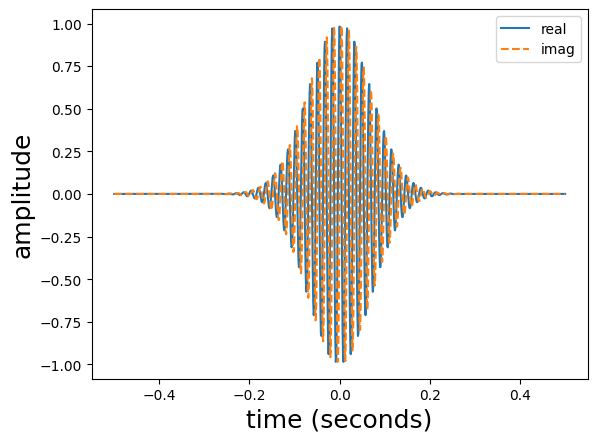

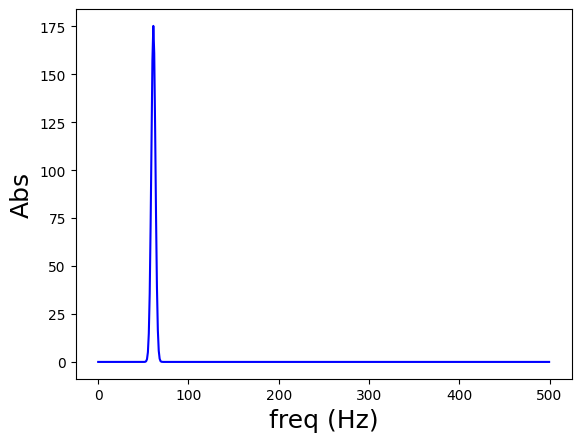

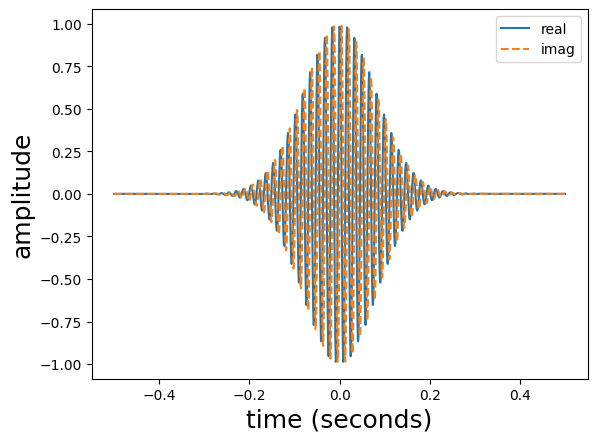

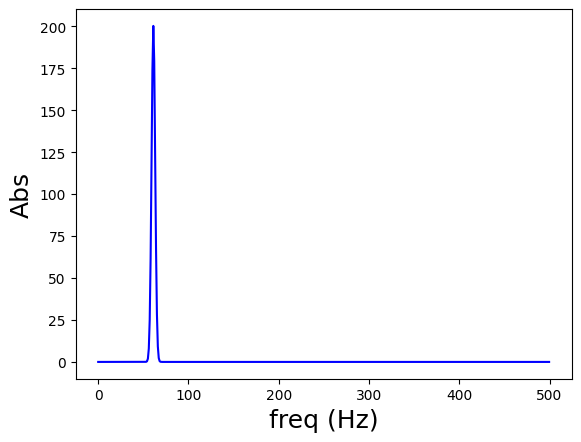

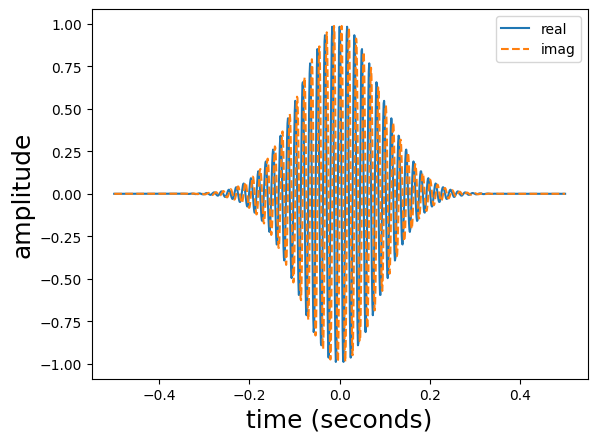

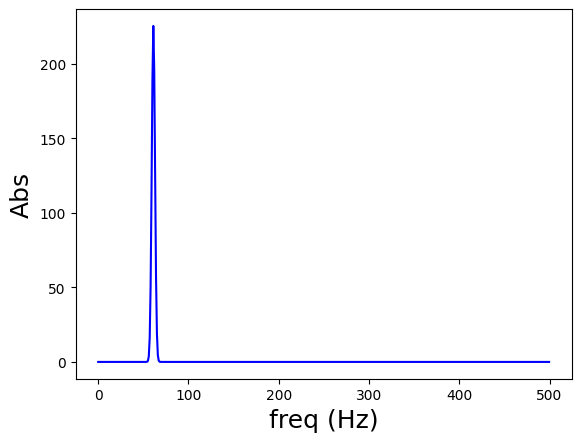

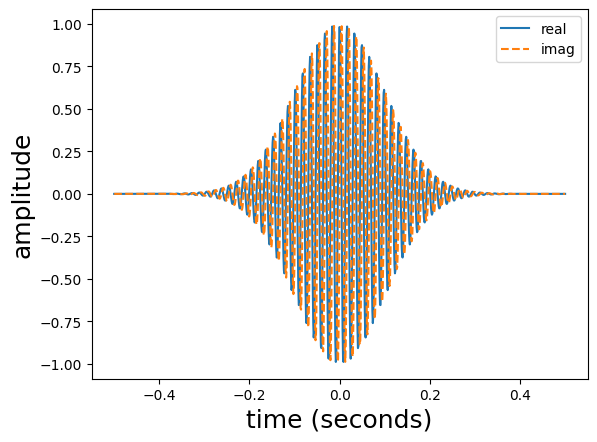

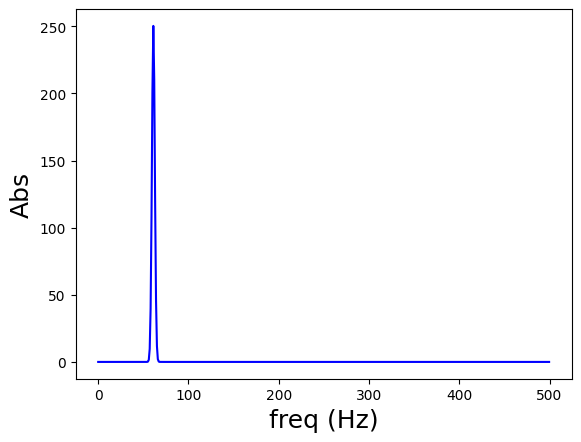

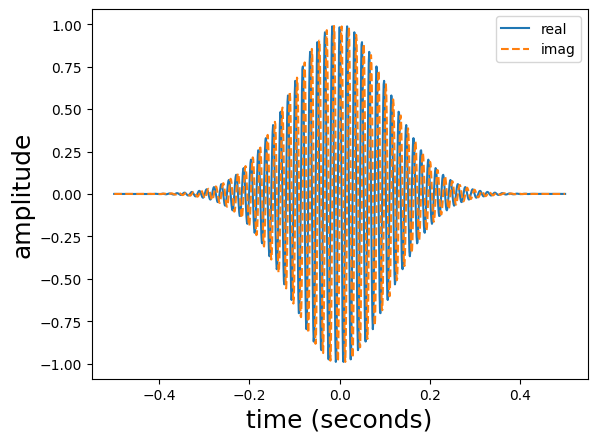

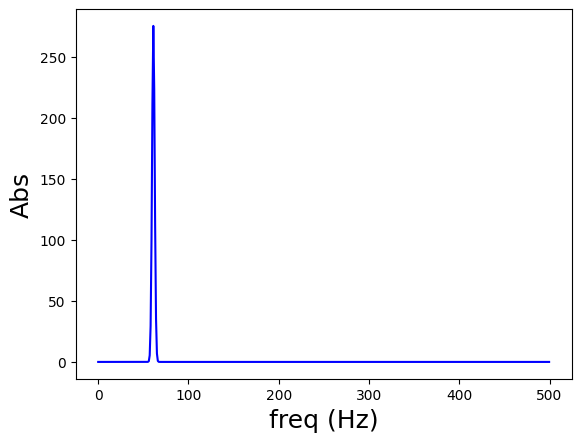

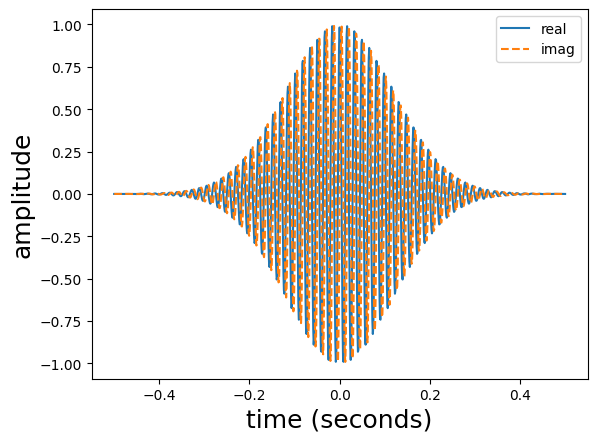

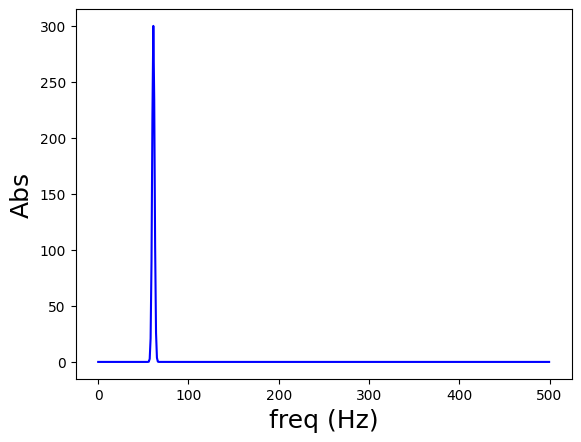

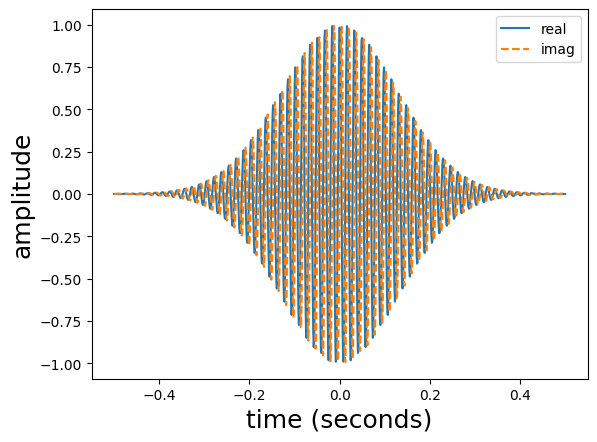

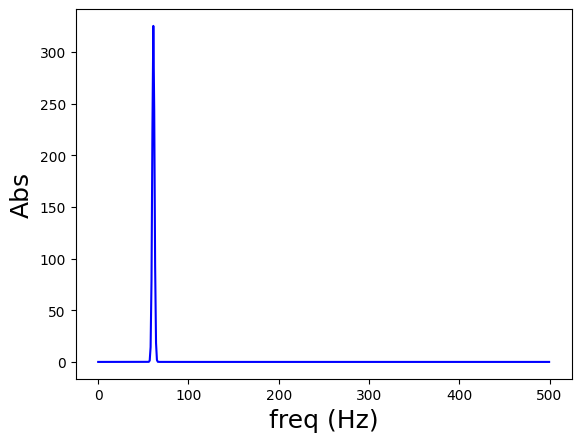

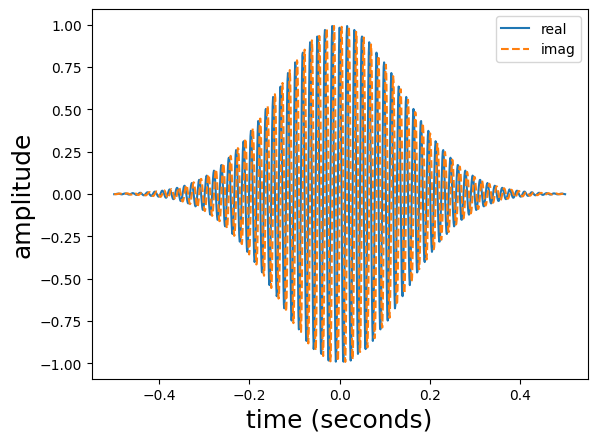

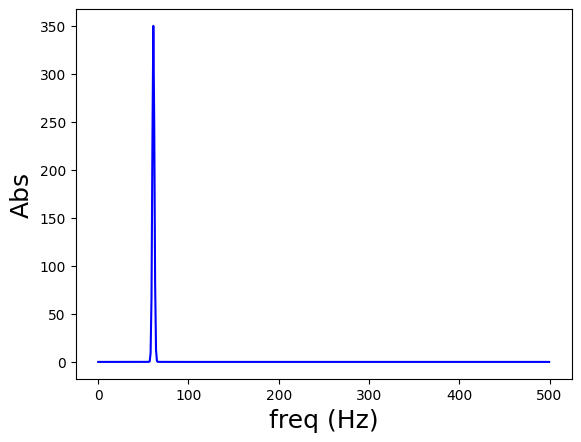

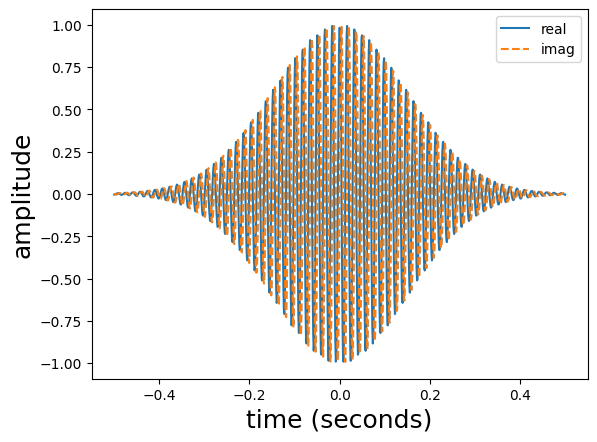

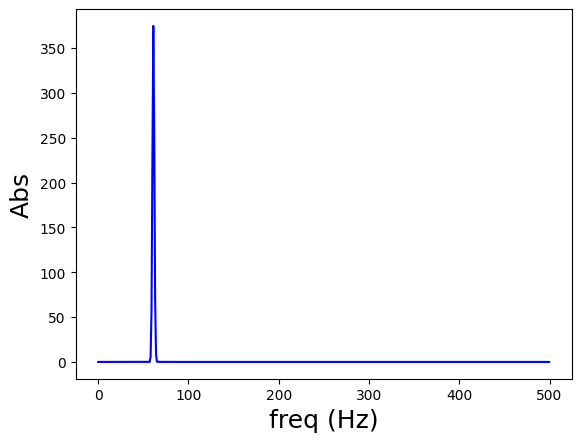

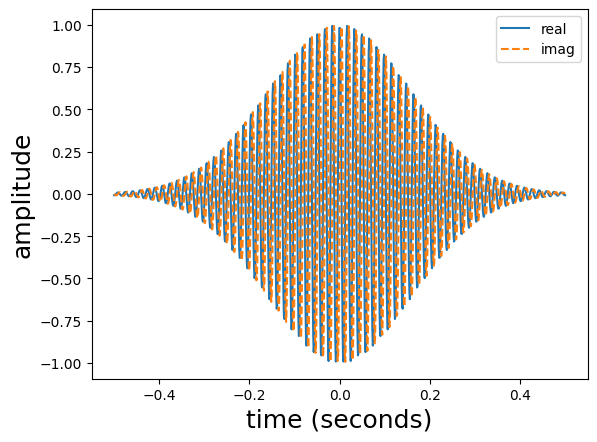

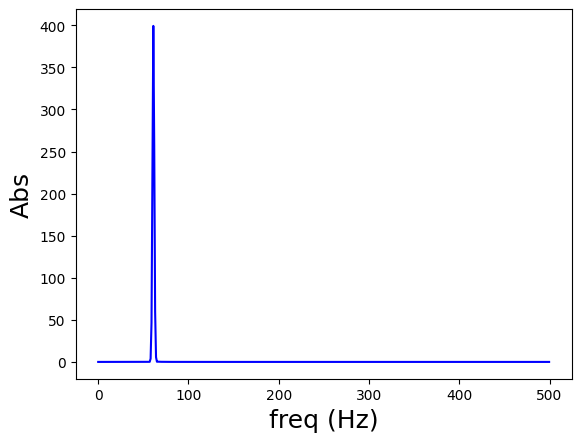

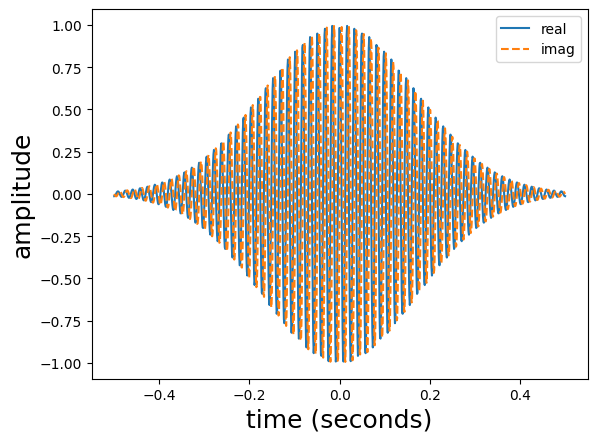

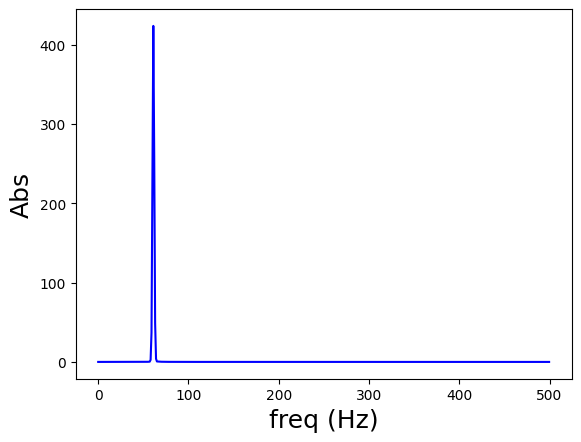

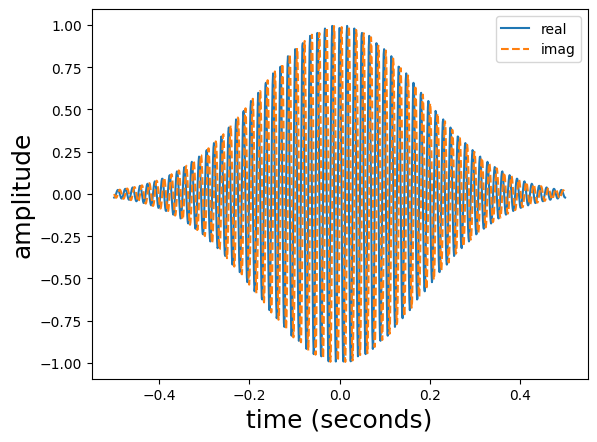

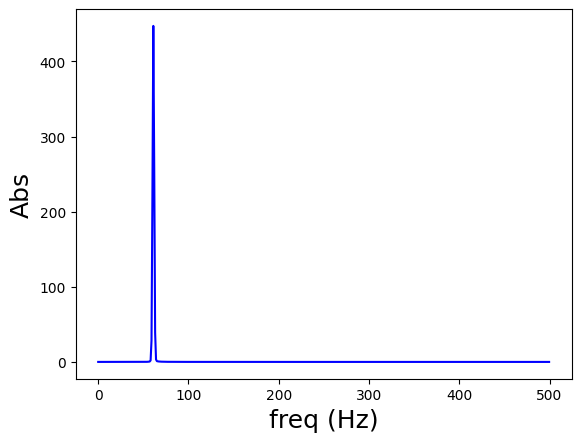

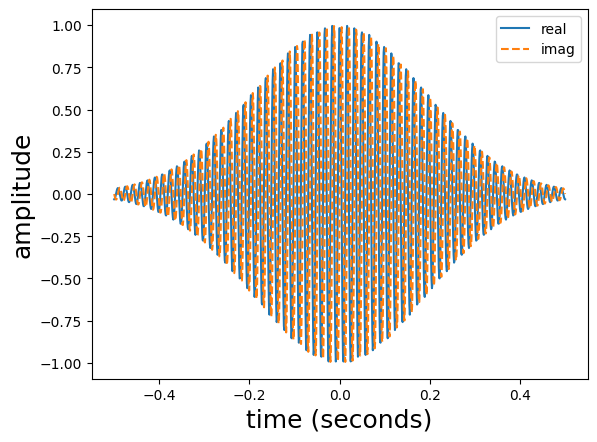

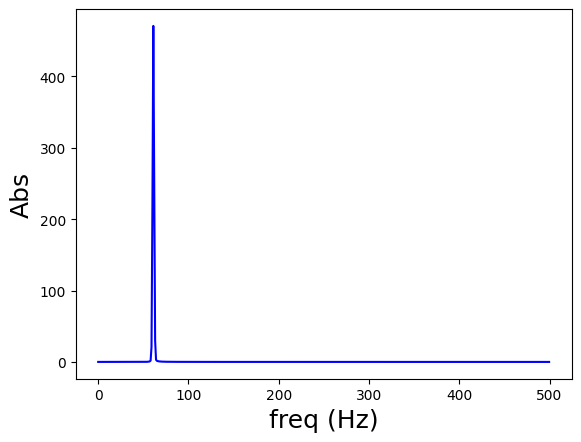

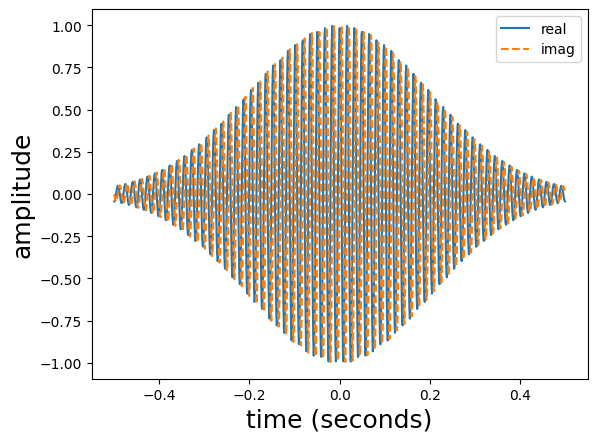

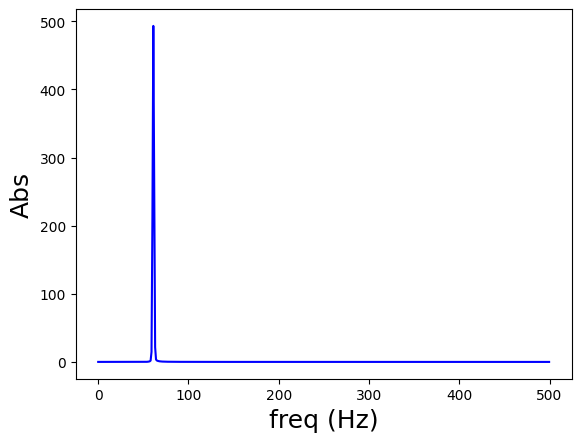

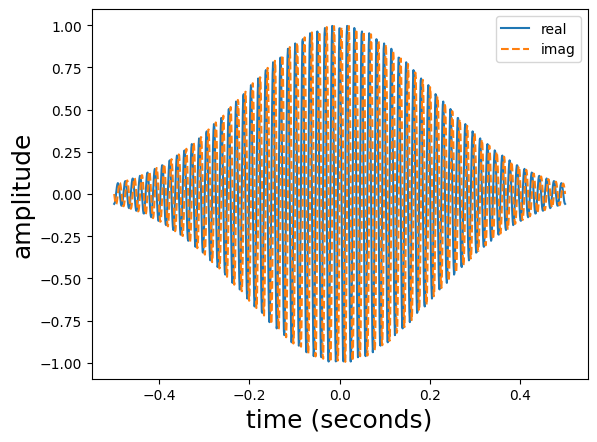

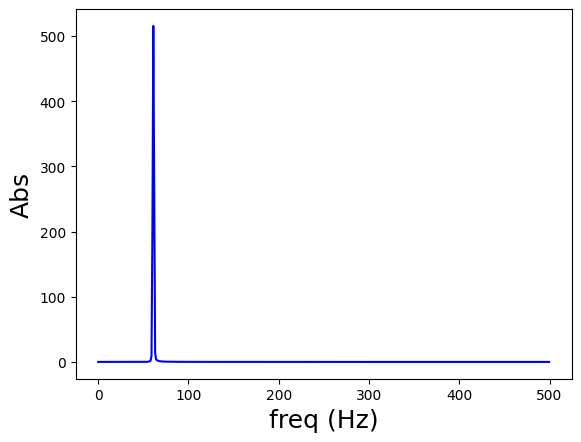

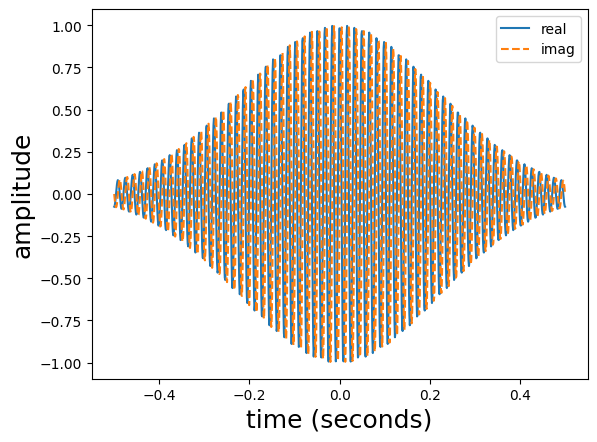

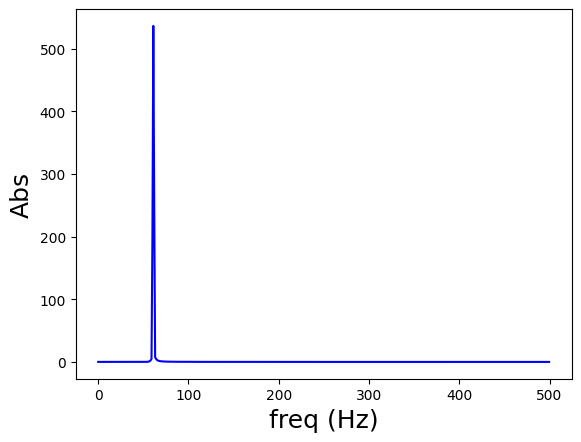

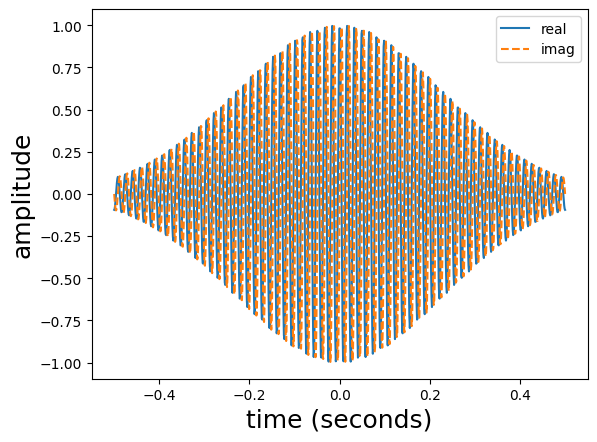

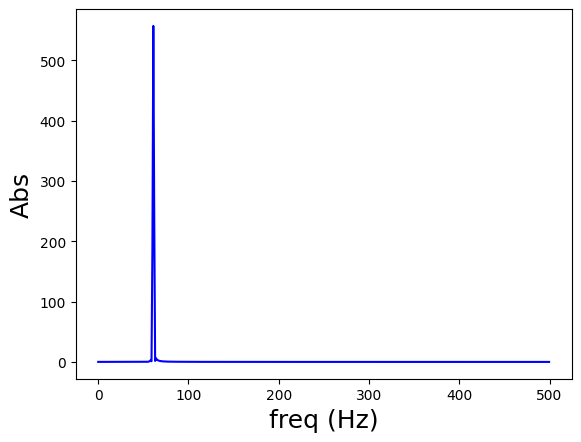

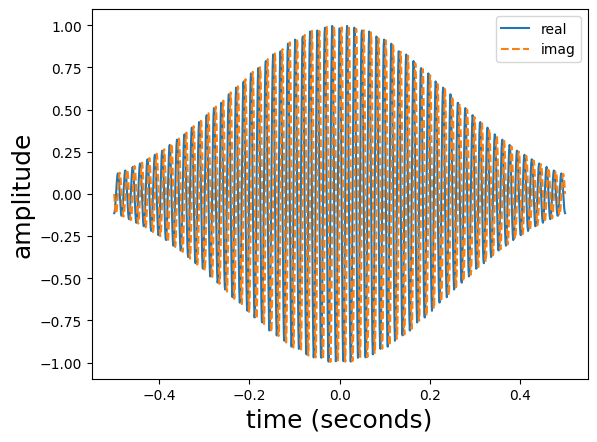

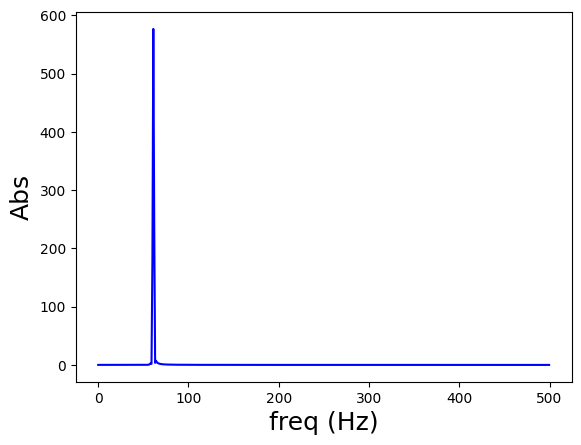

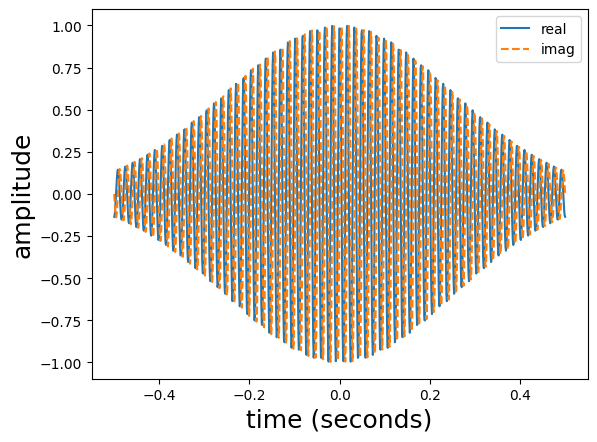

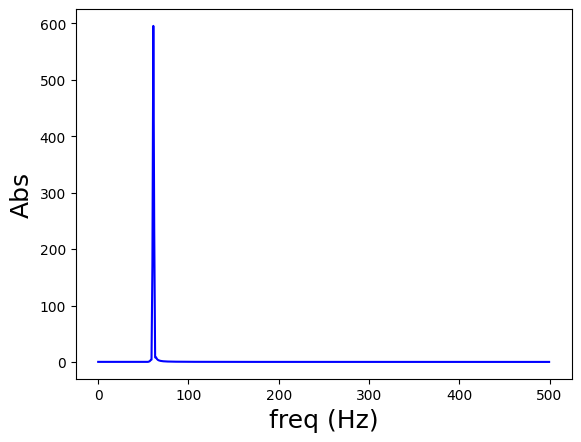

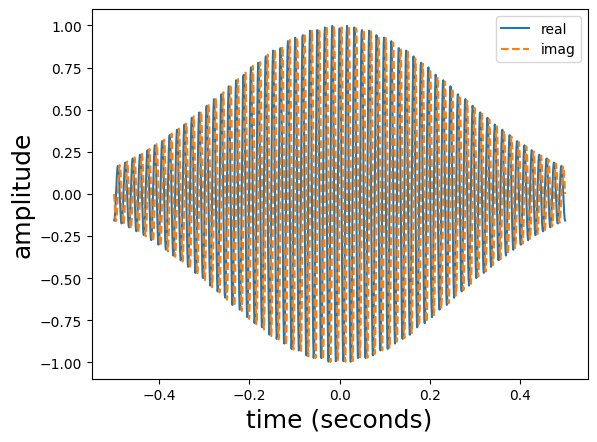

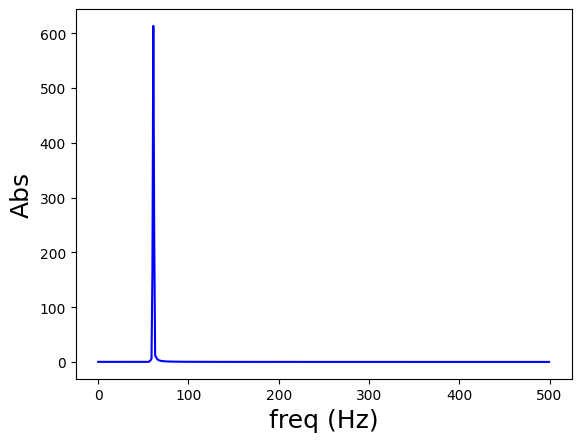

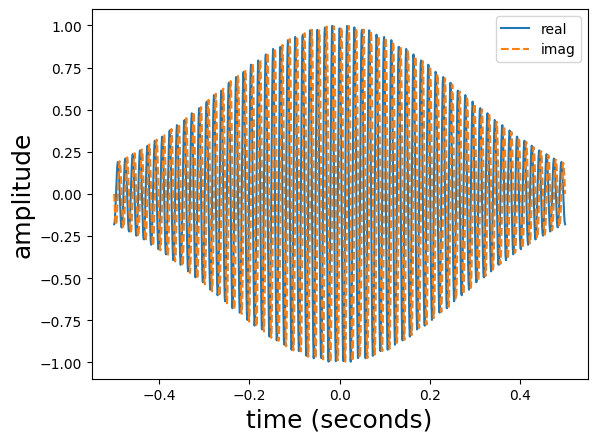

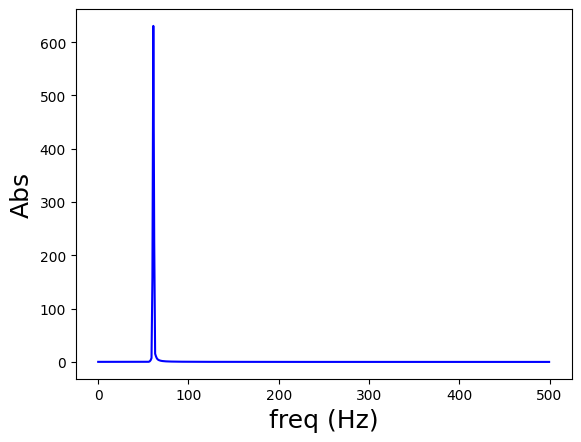

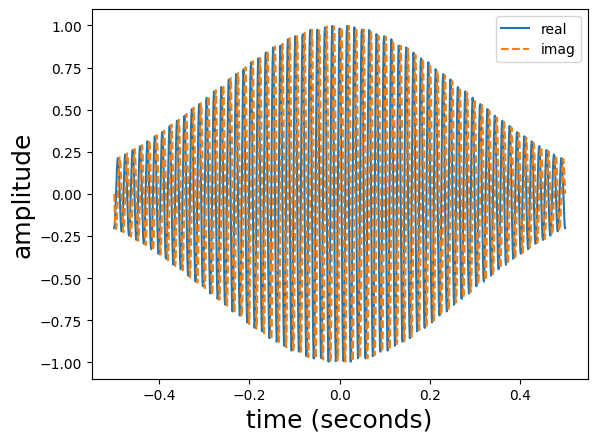

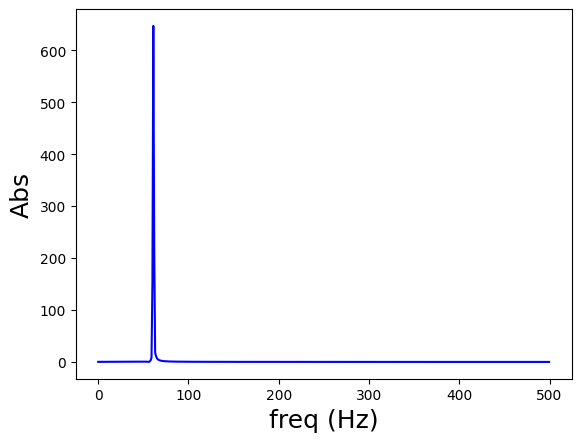

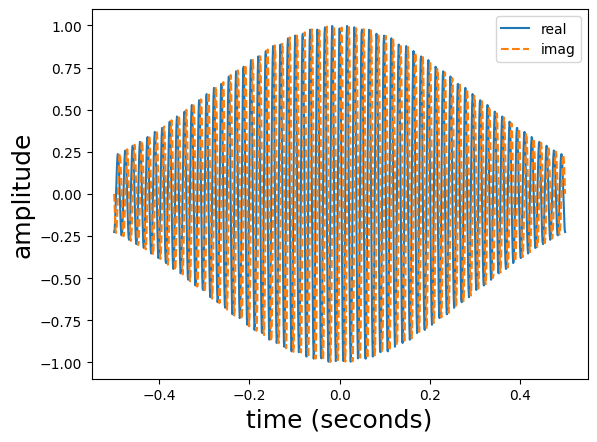

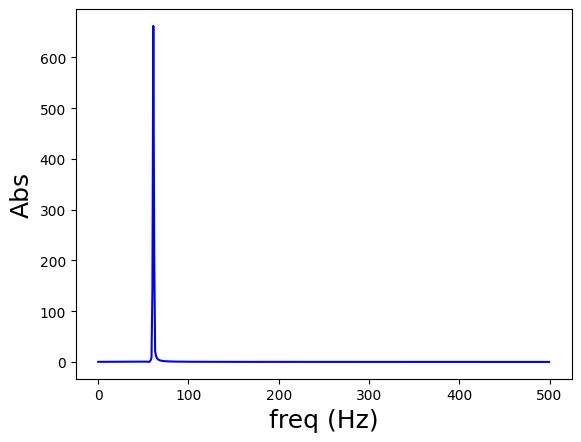

In [ ]:
# Thay đổi sigma và f để xem xét tính chất co giãn trong miền thời gian và tần số
# Code heree...
for sig in np.arange(0.01, 0.3, 0.01):
    psi = calc_morlet_psi_simple(t, f, sig)
    plot_wavelet_time_domain(t, psi)
    plot_wavelet_freq_domain(psi, sr)
    plt.show()




Để xem xét sóng con ở các level khác nhau ta có thể bổ sung thêm tham số về dịch và scaling:
Giả sử sóng mẹ là $\Psi(t)$, các sóng con sinh ra từ $\Psi(t)$ bằng cách thay đổi tham số scales $a$ và dịch $b$ là: $\Psi(t)_{a,b} = \frac{1}{\sqrt(a)} .\Psi(\frac{t-b}{a}) $

Với biến đổi walet liên tục (Continous Wavelet Transform), a và b có thể nhận bất cứ giá trị nào (do vậy về cơ bản, số sóng con là vô hạn...).

Với biến đổi walet rời rạc (Discrete Wavelet Transform), a và b thường được chọn liên quan đến 2: $a= 2^m $ và $b =n.a = n.2^m$. Do vậy hàm sóng con trở thành: $\Psi(t)_{m,n} = (2)^{\frac{-m}{2}} .\Psi(2^{-m} t- n) $.
Để quyết định số sóng sử dụng, người ta thường tính ngược, từ dải tần cần phân tích => độ phân giải tần số => số mức phân tích => số sóng con...

In [ ]:
### hàm tạo sóng con:


def psi_ab(psi, a, b): # Cho trường hợp CWT
    wav = np.zeros(len(psi)*a + b)
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi)
    return wav



def psi_mn(psi, m, n): # Cho trường hợp DWT
    a = 2**m
    b = n*2**m
    wav = np.zeros(len(psi)*a + b)
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi)
    return wav


<ipython-input-12-3e3986709da3>:15: ComplexWarning: Casting complex values to real discards the imaginary part
  wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi)


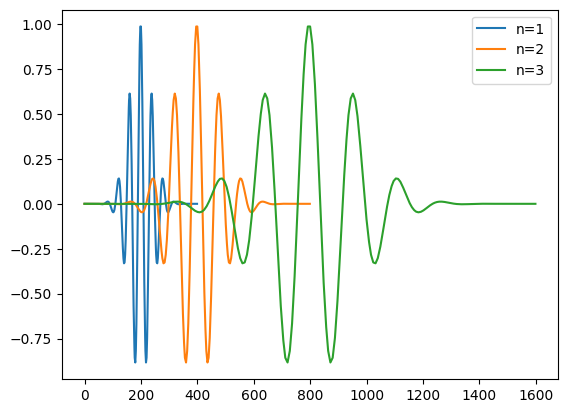

In [ ]:
t = torch.linspace(-0.5, 0.5, 200)  # Create wavelet from -0.5 to 0.5 seconds with 2000 points
sr = 200
freq_hz = 10.0
sig = 0.1
psi = calc_morlet_psi_simple(t, freq_hz, sigma)

### Mô phỏng scaling của các sóng con:

for n in np.arange(1,4): # Scales
  wav= psi_mn(psi, n, 0)
  plt.plot(wav, label="n="+str(n))
plt.legend(loc="best")


In [ ]:
# Theo em mối liên hệ tần số của sóng mẹ và tần số  của sóng con như thế nào?
# Kiểm chứng lại ?



# Code here....

<ipython-input-12-3e3986709da3>:15: ComplexWarning: Casting complex values to real discards the imaginary part
  wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi)


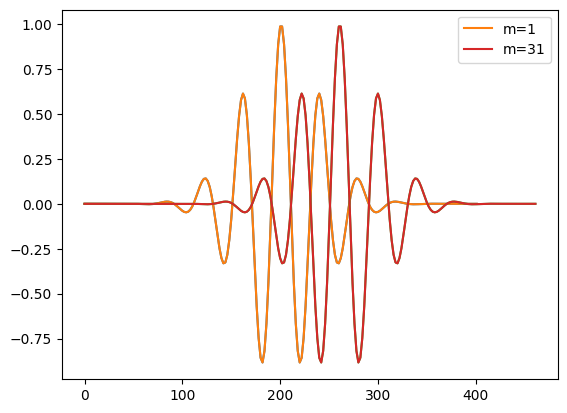

In [ ]:
# Mô phỏng tính chất dịch của sóng con:


for m in np.arange(1,50,30): # Shift
  wav= psi_mn(psi, 1, m)
  plt.plot(wav)
  plt.plot(wav, label="m="+str(m))
plt.legend(loc="best")

In [ ]:
# Khi thay đổi cả scale và translation ta được vô số các són con.
# Làm sao xác định số sóng con hay số level cần thiết?
# Code here....



Bây giờ ta thực hiện phân tích một tín hiệu theo sóng cong. Bản chất của bước này là tính tương quan giữa tín hiệu đã cho với từng sóng con một. Nếu tương quan lớn, kết quả hệ số lớn và ngược lại. Sử dụng hàm np.xcorr cho tính tương quan

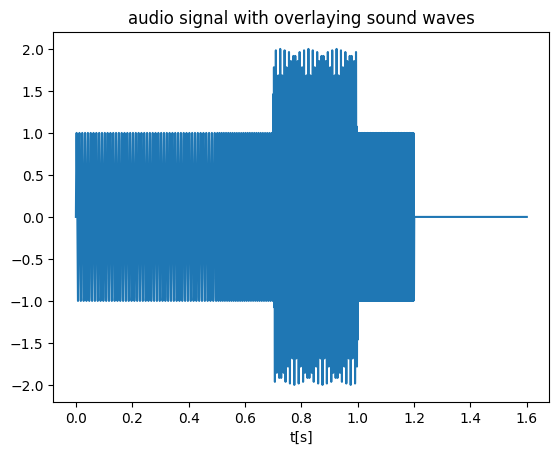

In [ ]:
##  Tương quan giữa tín hiệu và sóng con

# Tạo hàm sóng:

def hamming(n):
    """ Hamming window of size N for smoothing the edges of sound waves """
    return 0.54 - 0.46 * np.cos(2 * np.pi * np.arange(n) / (n-1))

def sin_signal(freq, duration, fs=10000):
    ln = int(duration*fs)
    sig = np.zeros(ln)
    sig = np.sin(np.arange(ln)*2*np.pi*freq/fs)
    return sig #*hamming(ln)

def sum_signal(Output, loc, freq, duration, fs=10000):
    Output[loc:int(loc+duration*fs)] += sin_signal(freq, duration, fs=fs)

fs=10000 ## =>1s = 10.000 samples
audio = np.zeros(16000) # 1.6s
sum_signal(audio, 0, 100, 0.5) # [0, 0.5s], f=100Hz
sum_signal(audio, 5000, 130, 0.5) # [0,5->1], f=130Hz
sum_signal(audio, 7000, 450, 0.5) # [0,7->1.2], f=450Hz


plt.plot(np.arange(len(audio),dtype="float32")/fs,audio)
plt.xlabel("t[s]")
plt.title("audio signal with overlaying sound waves")

plt.show()


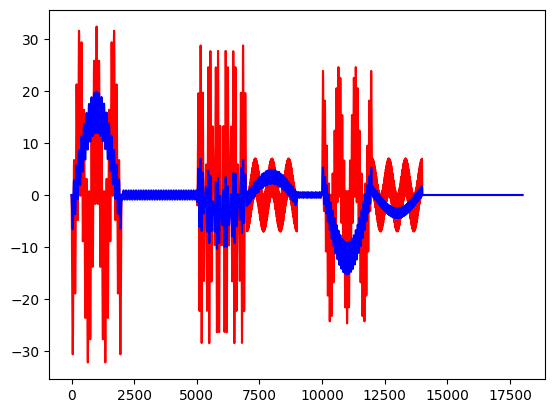

In [ ]:
t = torch.linspace(-0.01, 0.01, 2000)  # Create wavelet from -0.1 to 0.1 seconds

sig = 0.1
wav1 = calc_morlet_psi_simple(t, 29, sigma)
wav2 = calc_morlet_psi_simple(t, 150, sigma)

out1 = np.correlate(audio , wav1, mode='full')
out2 = np.correlate(audio , wav2, mode='full')


plt.plot(out2,'r') # 130
plt.plot(out1,'b')  # 29




<ipython-input-12-3e3986709da3>:15: ComplexWarning: Casting complex values to real discards the imaginary part
  wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi)


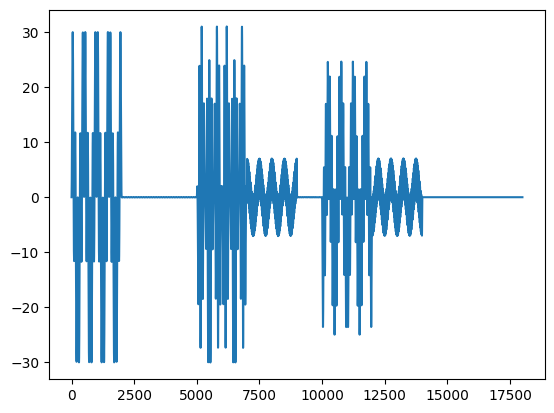

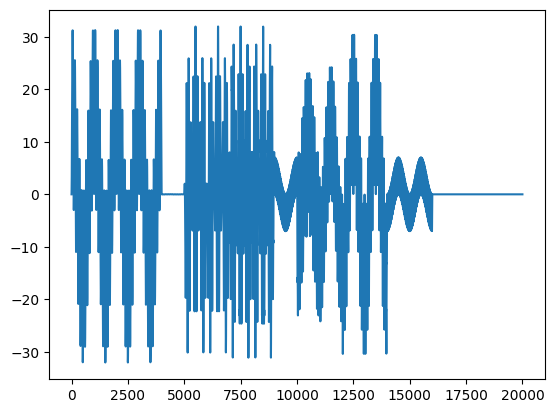

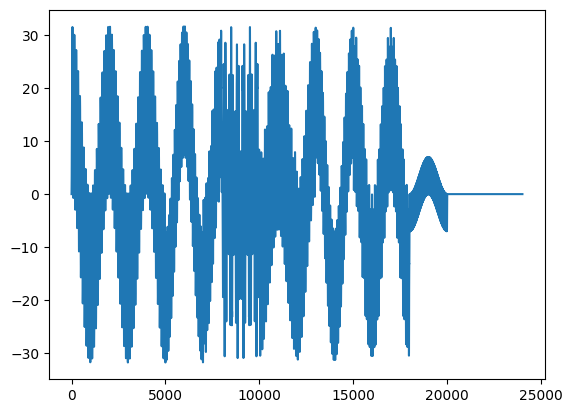

In [ ]:
### Sử dụng scaling func mình vừa viết:
sr = 10000
t = torch.linspace(-0.01, 0.01, 2000)
freq_hz = 200
sig = 0.4
mother_wav = calc_morlet_psi_simple(t,freq_hz  , sigma)
for m in np.arange(0,5):
  wav= psi_mn(mother_wav, m, m)
  out = np.correlate(audio , wav, mode='full')
  plt.plot(out)
  plt.show()





<ipython-input-20-d028fd65cb67>:6: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwtmatr1 = signal.cwt(audio, signal.morlet2, widths)


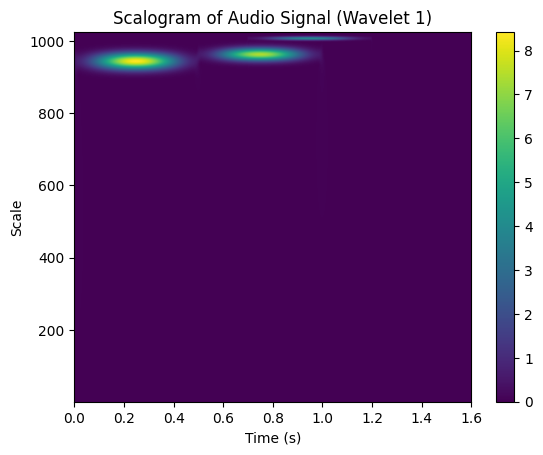

In [ ]:
### Scalogram using scipy signal
import scipy.signal as signal

# Calculate the scalogram using continuous wavelet transform (CWT)
widths = np.arange(1,1024)  # Define the range of scales for the wavelet
cwtmatr1 = signal.cwt(audio, signal.morlet2, widths)

# Plot the scalogram
plt.imshow(np.abs(cwtmatr1), extent=[0, len(audio) / fs, 1, 1024], cmap='viridis', aspect='auto')
plt.title('Scalogram of Audio Signal (Wavelet 1)')
plt.ylabel('Scale')
plt.xlabel('Time (s)')
plt.colorbar()
plt.show()

In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 36.5 MB/s eta 0:00:00


In [ ]:
# Using pywavelet

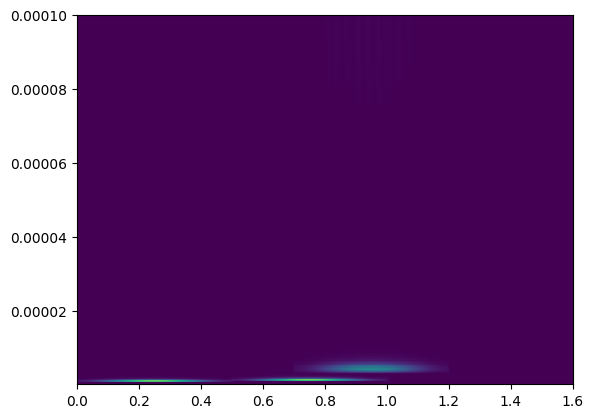

In [ ]:
import pywt

wavelet = "cmor1.5-1.0" ## Morlet
# logarithmic scale for scales, as suggested by Torrence & Compo:
widths = np.geomspace(1, 1024, num=100)

cwtmatr, freqs = pywt.cwt(audio, widths, wavelet, sampling_period=10000)
# absolute take absolute value of complex result
cwtmatr = np.abs(cwtmatr[:-1, :-1])

# plot result using matplotlib's pcolormesh (image with annoted axes)
t= np.linspace(0, 1.6, 16000)
plt.pcolormesh( t, freqs, cwtmatr)

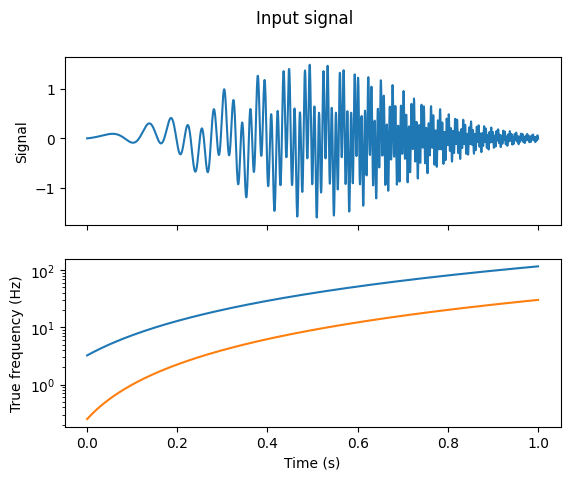

In [ ]:
### VD trong pywavelet CWT:
import pywt
import numpy as np
import matplotlib.pyplot as plt


def gaussian(x, x0, sigma):
    return np.exp(-np.power((x - x0) / sigma, 2.0) / 2.0)

def make_chirp(t, t0, a):
    frequency = (a * (t + t0)) ** 2
    chirp = np.sin(2 * np.pi * frequency * t)
    return chirp, frequency


# generate signal
time = np.linspace(0, 1, 2000)
chirp1, frequency1 = make_chirp(time, 0.2, 9)
chirp2, frequency2 = make_chirp(time, 0.1, 5)
chirp = chirp1 + 0.6 * chirp2
chirp *= gaussian(time, 0.5, 0.2)

# plot signal
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(time, chirp)
axs[1].plot(time, frequency1)
axs[1].plot(time, frequency2)
axs[1].set_yscale("log")
axs[1].set_xlabel("Time (s)")
axs[0].set_ylabel("Signal")
axs[1].set_ylabel("True frequency (Hz)")
plt.suptitle("Input signal")
plt.show()

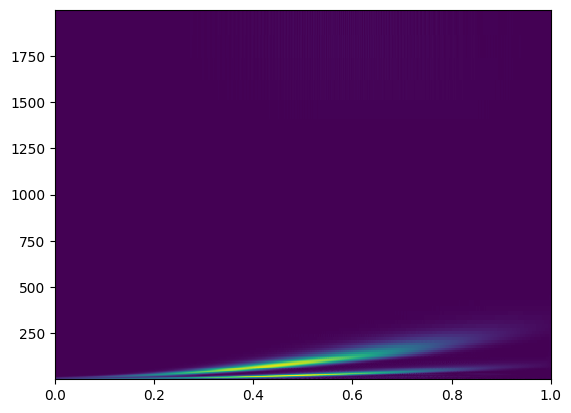

In [ ]:
# perform CWT
wavelet = "cmor1.5-1.0" ## Morlet
# logarithmic scale for scales, as suggested by Torrence & Compo:
widths = np.geomspace(1, 1024, num=100)
sampling_period = np.diff(time).mean()
cwtmatr, freqs = pywt.cwt(chirp, widths, wavelet, sampling_period=sampling_period)
# absolute take absolute value of complex result
cwtmatr = np.abs(cwtmatr[:-1, :-1])

# plot result using matplotlib's pcolormesh (image with annoted axes)

pcm = plt.pcolormesh(time, freqs, cwtmatr)


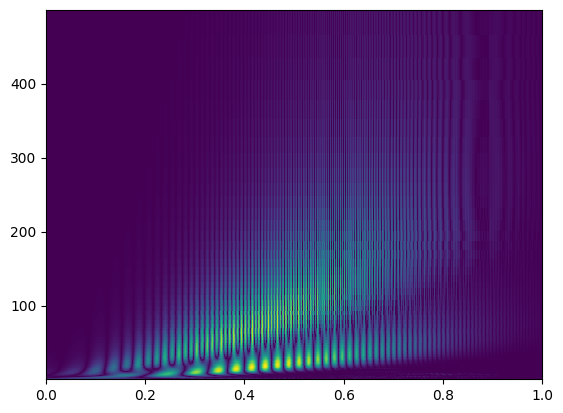

In [ ]:
### Bây giờ  hãy thử lại phân tích tín hiệu chirp bên trên với một vài loại sóng con khác? Với mỗi loại, vẽ scalogram? Có sự khác biệt nhiều giữa chúng không? Hãy giải thích tại sao?

# Sóng con mexican hat
# Sóng con Gauss...

wavelets = []
wavelets.append("mexh")
# wavelets.append("gaus1")

wavelet = wavelets[0]
widths = np.geomspace(1, 1024, num=100)
sampling_period = np.diff(time).mean()
cwtmatr, freqs = pywt.cwt(chirp, widths, wavelet, sampling_period=sampling_period)
cwtmatr = np.abs(cwtmatr[:-1, :-1])
plt.pcolormesh(time, freqs, cwtmatr)









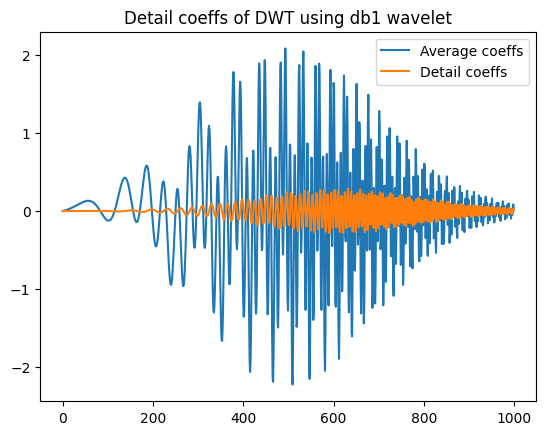

In [ ]:
# Sóng con haar....
# Sóng con Daubechies
# Sóng con Coifet

wavelets = []
wavelets.append("haar")
wavelets.append("db1")
wavelets.append("coif1")
import numpy as np
import matplotlib.pyplot as plt
import pywt

wavelet = wavelets[1]
cA, cD = pywt.dwt(chirp, wavelet)
plt.plot(cA)
plt.title(f"Average coeffs of DWT using {wavelet} wavelet")

plt.plot(cD)
plt.title(f"Detail coeffs of DWT using {wavelet} wavelet")
plt.legend(["Average coeffs", "Detail coeffs"])

Phần 2: Phân tích qua lại tín hiệu giữa miền thời gian và wavelet.
Giống như FFT hay STFT, wavelet cũng có 2 phép toán gồm wavelet và inverse wavelet. Khi chuyển từ tín hiệu trong miền thời gian sang wavelet, ta phân tích tín hiệu thành tổ hợp của các hàm sóng con. Lưu ý, trong phép phân tích ta phải chọn họ sóng con cũng như số mức mình muốn phân tích. Đầu ra của phép phân tích là các hệ số tương ứng với approximate (Lowpass) và detail (High pass)

Khi làm phép khôi phục lại tín hiệu ban đầu dùng inverse wavelet, ta cũng cần chỉ ra họ sóng con và các ma trận hệ số approximate (Lowpass) và detail (High pass) tương ứng.

Trong thư viện Pywavelets có các hàm thực hiện các phép này là CWT và ICWT; DWT và IDWT. Đọc thêm trong tài liệu https://pywavelets.readthedocs.io/en/latest/ref/dwt-discrete-wavelet-transform.html để biết cách sử dụng các hàm này trước khi làm bài lab như yêu cầu bên dưới:

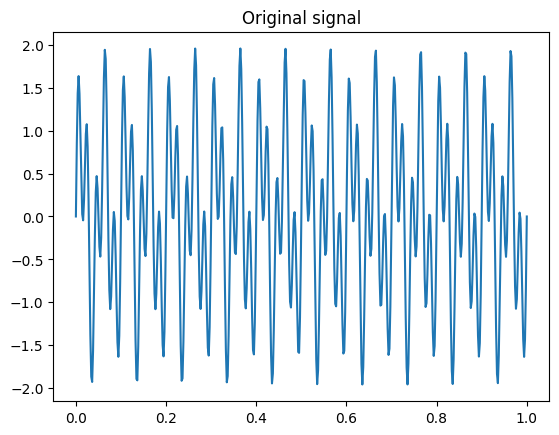

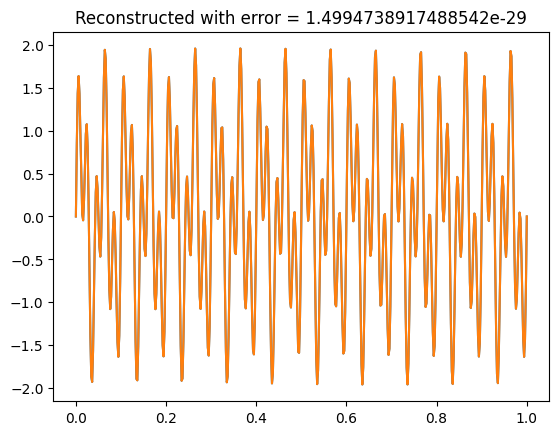

In [ ]:
## Hãy viết code để kiểm thử khả năng phân tích của wavelet lên tín hiệu bất kỳ?
## Đánh giá sai số giữa các quá trình chuyển đổi từ thời gian ==> wavelets ===> tín hiệu???

### Code với tín hiệu sin (hoặc tổng của vài tín hiệu sin như audio bên trên .....)
import numpy as np
# Tạo tín hiệu:
fs = 500
t = np.linspace(0, 1, fs)

f1 = 50
x1 = np.sin(2*np.pi*f1*t)
f2 = 20
x2 = np.sin(2*np.pi*f2*t)
x = x1 + x2
plt.plot(t, x)
plt.title("Original signal")
plt.show()


## Tính wavelet sau đó inverse wavelet của tín hiệu đó....
## Tính toán sai số.....
## Plot sai số....

wavelet = "db1"
cA, cD = pywt.dwt(x, wavelet)
reconstructed_x = pywt.idwt(cA, cD, wavelet)
plt.plot(t, x, label="Original signal")
plt.plot(t, reconstructed_x, label="Reconstructed signal")
plt.title(f"Reconstructed with error = {np.sum((x - reconstructed_x)**2)}")
plt.show()




In [ ]:
# Code lại ý bên trên nhưng với file âm thanh
### Link file dữ liệu ở đây....
# tro giang ?????????????????????????????


# Sai số ....





In [ ]:
# Nếu file âm thanh dài hơn, ta xử lý như thế nào.....?


**Phần 3: Ứng dụng của wavelet trong thực tế như lọc nhiễu, tìm đỉnh tín hiệu ....**


Lọc nhiễu: Đây là một trong ứng dụng khá phổ biến của wavelet được sử dụng trong thực tế, đặc biệt như xử lý tín hiệu y sinh, tín hiệu hình ảnh.

Trong ví dụ này, ta có thể làm bài toán lọc nhiễu dựa trên chọn ngưỡng và chọn số levels wavet thích hợp....

Ý tưởng của phương pháp vẫn là:


1.   Phân tích tín hiệu thành các sóng con sử dụng các hàm trong PyWavelets.
2.   Đặt ngưỡng trên các hệ số của Detail coef :
+Chọn ngưỡng dựa theo công thức:  $threshold= sqrt(2 x log(m)) $, trong đó m là chiều dài của tín hiệu; hoặc chọn ngưỡng dựa trên mức năng lượng của các hệ số Detail.
Ngoài ra khi chọn ngưỡng, ta có thể sử dụng Hard thresholding hoặc soft thresholding.


Hard thresholding
res = x * (np.abs(x) > thr)

Soft thresholding
res = ((x >= thr) * (x - thr) + (x <= -thr) * (x + thr)  + (np.abs(x) <= thr) * 0)

Trong pywavelet có hàm threshold giúp thực hiện việc này

3. Sau đó biến đổi ngược các hệ số phân tích sóng con , để thu được tín hiệu đã lọc nhiễu...

4. Video này có giải thích thêm về cơ chế chọn ngưỡng để lọc nhiễu trên tín hiệu và tại sao nó lại hoạt động https://www.youtube.com/watch?v=mcUZccLsPYE


5. Xem thêm ở đây https://github.com/CSchoel/learn-wavelets/blob/main/wavelet-denoising.ipynb





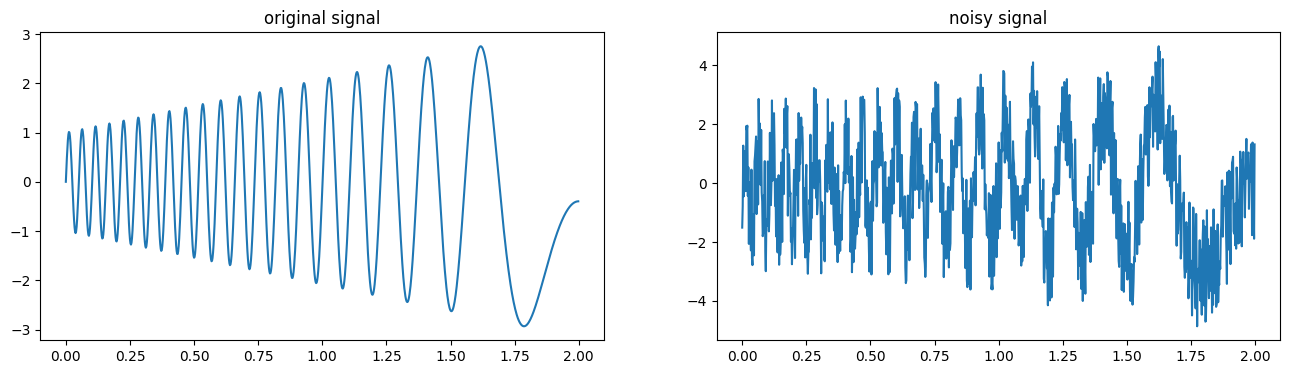

In [ ]:
## Tạo tín hiệu
##Ví dụ

def Signal_generator(freqs, dt, amp_inc=10, t0=0):
    t = np.arange(len(freqs)) * dt + t0
    amp = np.linspace(1, np.sqrt(amp_inc), len(freqs))
    sig = amp * np.sin(2*np.pi*freqs  * t)
    return t,sig

def noise(sig, noise_amp=1):
    return sig + (np.random.random(len(sig))-0.5)*2*noise_amp


t_dop, sig_dop = Signal_generator(np.arange(10,20,0.01)[::-1], 0.002)
sig_dop_n2 = noise(sig_dop, noise_amp=2)
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.plot(t_dop, sig_dop)
plt.title("original signal")
plt.subplot(122)
plt.plot(t_dop, sig_dop_n2)
plt.title("noisy signal")
plt.show()

In [ ]:
## Biến đổi wavelet trên tín hiệu nhiễu....
wavelet = "db1"
cA, cD = pywt.dwt(sig_dop, wavelet)



In [ ]:
## Chọn ngưỡng.....
threshold = (np.sqrt(2) * np.std(cD))

### Sử dụng ngưỡng để lọc nhiễu
cD[np.abs(cD) < threshold] = 0



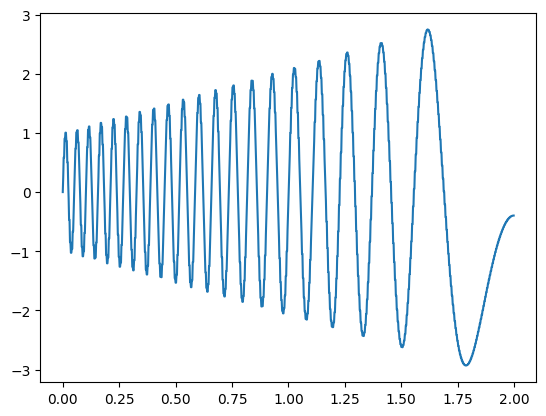

In [ ]:
## Tín hiệu khôi phục được: (tính inv ....)
reconstructed_signal = pywt.idwt(cA, cD, wavelet)


## so sánh với tín hiệu cũ (vẽ trên cùng 1 hình, sử dụng mầu sắc khác nhau....)
plt.plot(t_dop, reconstructed_signal)



Thay đổi với các sóng con khác, liệu kết quả có thay đổi không? Tại sao? Viết chương trình kiểm thử lại kết quả......

In [ ]:
# Thử với mô hình nhiễu khác
# SV có thể xem 1 tutorrial vể wavelet cho lọc nhiễu trên Matlab ở đây https://atmos.washington.edu/~breth/classes/AS552/matlab/lect/html/wavelet_leleccum.html
# Download file dữ liệu : leleccum.mat theo link :
# Sau đó upload lại lên colab để làm việc !!!

import scipy.io
mat = scipy.io.loadmat('/content/leleccum.mat')
noisy_signal= mat['leleccum'][0]
noisy_signal = np.array(noisy_signal, dtype =float)

# Vẽ 1 đoạn tín hiệu:
plt.plot(noisy_signal[0:5000])




In [ ]:
### Bây giờ thử lại với tín hiệu âm thanh
### Link data https://www.dropbox.com/scl/fo/w4qaa5938a68foxvt2ihi/AE4edPdwQO1gRk5THcUZKhE?rlkey=tf6cjubaz4o1zoa9a4fyqhprc&dl=0
### Đây là tín hiệu âm thanh bị nhiễu. Ta không có thông tin gì về nhiễu trên tín hiệu. Do vậy sau khi lọc nhiễu, hãy nghe lại và đánh giá





In [ ]:
## Advantage:
## Tìm đỉnh (peaks) tín hiệu
### Với tín hiệu tiếng nói, phát hiện các đỉnh pitch có thể giúp phân biệt người nói là Nam hay Nữ. Với Nam, khoảng cách giữa 2 pitchs liên tiếp trong khoảng 0.4 s; với Nữ là .8s
## Để làm bài toán này ta cần phát hiện được các pitch trong 1 đoạn tiếng nói.

### Sử dụng wavelet ta có thể tìm đỉnh của tín hiệu
###https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks_cwt.html








In [ ]:
#\
